In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, CuDNNLSTM

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train/255.0
x_test = x_test/255.0
print(x_train.shape)

(60000, 28, 28)


In [6]:
model = Sequential()
model.add(CuDNNLSTM(128, input_shape=(x_train.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))

model.add(CuDNNLSTM(128))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_1 (CuDNNLSTM)     (None, 28, 128)           80896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 128)               132096    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total para

In [8]:
hist = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 52s 867us/step - loss: 0.3908 - acc: 0.8797 - val_loss: 0.0938 - val_acc: 0.9704
Epoch 2/2
60000/60000 [==============================] - 50s 833us/step - loss: 0.1187 - acc: 0.9686 - val_loss: 0.0947 - val_acc: 0.9717


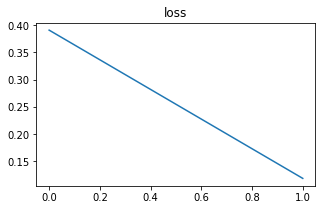

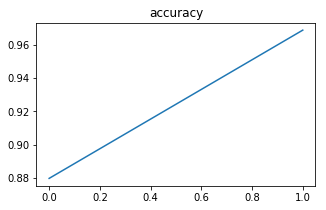

In [9]:
plt.figure(figsize=(5,3))
plt.plot(hist.epoch,hist.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(hist.epoch,hist.history['acc'])
plt.title('accuracy');